![](https://user-images.githubusercontent.com/8117267/116876711-8defc300-ac25-11eb-8b7b-5eab8860602c.png)



### Notes
* While this will work for small datasets in a Colab runtime, larger datasets will require more compute power;
* If you would like to train a model on a serious dataset, you should consider copying this to your own workstation and running it there. Some minor modifications will be required, and you will have to install the dependencies separately;

```bibtex
@inproceedings{prokudin2021smplpix,
  title={SMPLpix: Neural Avatars from 3D Human Models},
  author={Prokudin, Sergey and Black, Michael J and Romero, Javier},
  booktitle={Proceedings of the IEEE/CVF Winter Conference on Applications of Computer Vision},
  pages={1810--1819},
  year={2021}
}
```


In [ ]:
# @title Upload your image
import os

RES_DIR = '/content/data'
FRAMES_DIR = os.path.join(RES_DIR, 'images')
!rm -rf $RES_DIR
!mkdir $RES_DIR
!mkdir $FRAMES_DIR

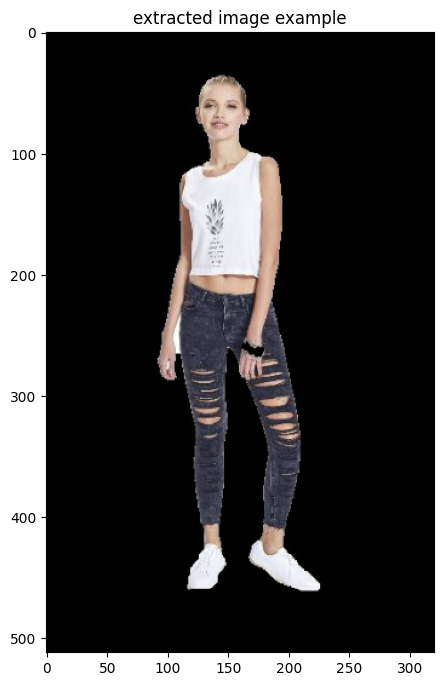

In [ ]:
# @title Input your data in /content/data/images
filename =     "sample.png"# @param {type:'string'}

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_img(img_path):

  return np.asarray(Image.open(img_path))/255

test_img_path = os.path.join(FRAMES_DIR, os.listdir(FRAMES_DIR)[0])

test_img = load_img(test_img_path)

plt.figure(figsize=(5, 10))
plt.title("extracted image example")
plt.imshow(test_img)

# Run openpose on ready image

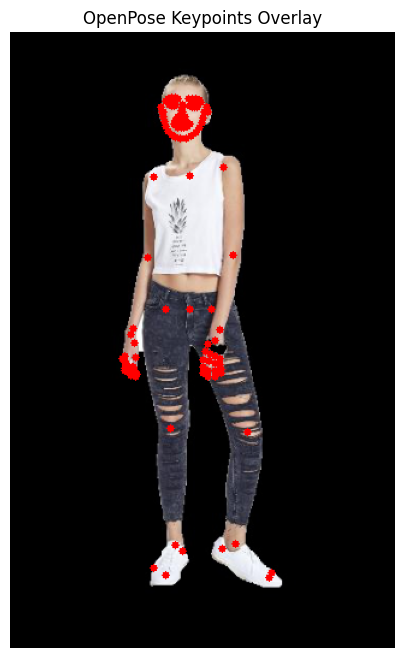

In [ ]:
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Paths
img_path = "/content/data/images/sample.png"  # adjust as needed
json_path = "/content/data/openpose/sample_keypoints.json"

# Load image and JSON
img = cv2.imread(img_path)[..., ::-1]  # BGR to RGB
with open(json_path) as f:
    data = json.load(f)

keypoints = data['people'][0]

# Extract keypoints
pose = np.array(keypoints['pose_keypoints_2d']).reshape(-1, 3)
face = np.array(keypoints['face_keypoints_2d']).reshape(-1, 3)
lh = np.array(keypoints['hand_left_keypoints_2d']).reshape(-1, 3)
rh = np.array(keypoints['hand_right_keypoints_2d']).reshape(-1, 3)

# Plotting function
def plot_keypoints(img, keypoints_list, radius=3, color=(255, 0, 0)):
    img_copy = img.copy()
    for keypoints in keypoints_list:
        for x, y, conf in keypoints:
            if conf > 0.3:
                cv2.circle(img_copy, (int(x), int(y)), radius, color, -1)
    return img_copy

# Overlay keypoints on image
overlay = plot_keypoints(img, [pose, face, lh, rh])

# Show result
plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title("OpenPose Keypoints Overlay")
plt.axis('off')
plt.show()



## Infer 3D Human Model with [SMPLify-X](https://smpl-x.is.tue.mpg.de/)

In [ ]:
# @title Install SMPLify-X and other dependencies

%cd /content
!pip install chumpy
!pip install smplx[all]
!git clone https://github.com/vchoutas/smplx
%cd smplx
!python setup.py install

#vposer
!pip install git+https://github.com/nghorbani/configer
!pip install git+https://github.com/nghorbani/human_body_prior
#!pip install git+https://github.com/sergeyprokudin/human_body_prior

#!pip install torch==1.1.0
%cd /content
#!git clone https://github.com/sergeyprokudin/smplify-x
!git clone https://github.com/KyujinHan/Smplify-X-Perfect-Implementation
%cd /content/Smplify-X-Perfect-Implementation
!pip install -r requirements.txt # Error is okay. Just pass.

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58263 sha256=19b5e86d53f12f0b0241615917bd1887069194f545dfb3e33d8c0ddec9c9b122
  Stored in directory: /root/.cache/pip/wheels/91/96/31/3e16aa7084783b2e57a81bb9a7fa3598d32445a964b1692259
Successfully built chumpy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/smplx-0.1.28-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Cloning https://github.com/nghorbani/human_body_prior to /tmp/pip-req-build-mv5n3cm0
  Running command git clone --filter=blob:none --quiet https://github.com/nghorbani/human_body_prior /tmp/pip-req-build-mv5n3cm0
  Resolved https://github.com/nghorbani/human_body_prior to commit 4c246d8a83ce16d3cff9c79dcf04d81fa440a6bc
  Preparing metadata (setup.py) ... done
  Created wheel for human_body_prior: filename=human_body_prior-2.2.2.0-py3-none-any.whl size=7610621 sha256=e2df2c0e4a3264f37cd96fe352a69813a6a4e5d38215138398e2211a82086dd5
  Stored in directory: /tmp/pip-ephem-wheel-cache-ecvl1_mr/wheels/95/9f/da/f130895831064a10a0715a7f264ac09c9e98587a95fbd3dac5
Successfully built human_body_prior
/content
Cloning

# Download models vposer and smplx

In [ ]:
!pip install -q gdown

import os

# Download SMPL-X model from public GDrive link
SMPLX_FILE_ID = '1piY1KEjdPUj3bT1BCcr8TJNkRQsFFaVp'
SMPLX_ZIP_PATH = '/content/models_smplx_v1_1.zip'

# Download VPoser model from public GDrive link
VPOSER_FILE_ID = '1pXmw9gncLWi500xPgNDOafVopC3yTZ4q'
VPOSER_ZIP_PATH = '/content/V02_05.zip'

# Download SMPL-X model if not exists
if not os.path.exists(SMPLX_ZIP_PATH):
    !gdown --id $SMPLX_FILE_ID -O $SMPLX_ZIP_PATH
else:
    print("SMPL-X model zip already downloaded.")

# Download VPoser model if not exists
if not os.path.exists(VPOSER_ZIP_PATH):
    !gdown --id $VPOSER_FILE_ID -O $VPOSER_ZIP_PATH
else:
    print("VPoser model zip already downloaded.")

# Create directories and extract files
SMPLX_MODEL_PATH = '/content/smplx'
!mkdir -p $SMPLX_MODEL_PATH
!unzip -n $SMPLX_ZIP_PATH -d $SMPLX_MODEL_PATH

VPOSER_MODEL_PATH = '/content/vposer'
!mkdir -p $VPOSER_MODEL_PATH
!unzip -n $VPOSER_ZIP_PATH -d $VPOSER_MODEL_PATH

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/smplx-0.1.28-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
SMPL-X model zip already downloaded.
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1pXmw9gncLWi500xPgNDOafVopC3yTZ4q
From (redirected): https://drive.google.com/uc?id=1pXmw9gncLWi500xPgNDOafVopC3yTZ4q&confirm=t&uuid=aed45100-dd72-43a5-a19c-753b02a29e78
To: /content/V02_05.zip
100% 82.5M/82.5M [00:01<00:00, 74.9MB/s]
Archive:  /content/models_smplx_v1_1.zip
   creating: /content/smplx/models/
   creating: /content/smplx/models/smplx/
  inflating: /content/smplx/models/smplx/S

In [ ]:
!pip install configargparse
!pip install omegaconf
!pip install loguru

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/smplx-0.1.28-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/smplx-0.1.28-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/smplx-0.1.28-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.6 MB/s eta 0:00:00


In [ ]:
!mkdir -p /content/smplx/models_smplx_v1_1/models
!mv /content/smplx/models_smplx_v1_1/smplx /content/smplx/models_smplx_v1_1/models/

In [ ]:
# @title Run SMPLify-X

# @markdown Please select gender of the SMPL-X model:

gender = 'female' #@param ["neutral", "female", "male"]

# @markdown Please keep in mind that estimating 3D body with SMPLify-X framework will take ~30-60 secs, so processing long videos at high FPS might take a long time.

!rm -rf /content/data/smplifyx_results
%cd /content/Smplify-X-Perfect-Implementation
!git pull origin

!python smplifyx/main.py --config cfg_files/fit_smplx.yaml \
    --data_folder  /content/data \
    --output_folder /content/data/smplifyx_results \
    --visualize=True \
    --gender=$gender \
    --model_folder /content/smplx/models_smplx_v1_1/models \
    --vposer_ckpt /content/vposer/V02_05\
    --part_segm_fn smplx_parts_segm.pkl

/content/Smplify-X-Perfect-Implementation
Already up to date.
Processing: /content/data/images/sample.png
/content/vposer/V02_05
2025-05-25 23:56:05.319 | INFO     | human_body_prior.tools.model_loader:load_model:97 - Loaded model in eval mode with trained weights: /content/vposer/V02_05/snapshots/V02_05_epoch=13_val_loss=0.03.ckpt
/content/Smplify-X-Perfect-Implementation/smplifyx/optimizers/lbfgs_ls.py:238: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha = 1) (Triggered internally at /pytorch/torch/csrc/utils/python_arg_parser.cpp:1661.)
  p.data.add_(step_size, update[offset:offset + numel].view_as(p.data))
Camera initialization done after 2.5071
Camera initialization final loss 257.1736
Orientation:   0% 0/1 [00:00<?, ?it/s]
                                      
Stage 000 done after 3.2228 seconds
Orientation:   0% 0/1 [00:03<?, ?it/s]
Stage:   0% 0/5 [00

# mesh

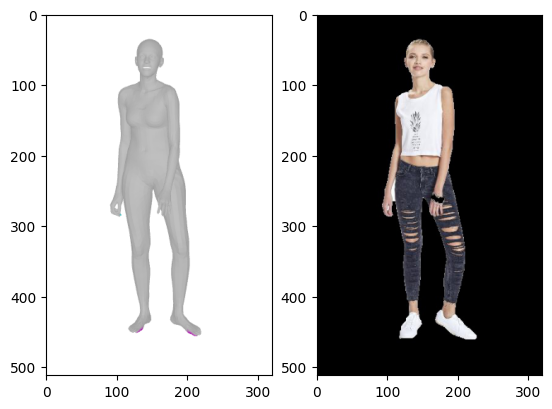

In [ ]:
## image
import matplotlib.pyplot as plt
from PIL import Image
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

img1 = Image.open('/content/data/smplifyx_results/rendered_smplifyx_meshes/00000.png')
img2 = Image.open('/content/data/images/sample.png')
ax1.imshow(img1)
ax2.imshow(img2)